In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Udhhav Arora\Desktop\Boston Crimes\crime.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

#### check data

In [5]:
df['OFFENSE_DESCRIPTION'].value_counts()

SICK/INJURED/MEDICAL - PERSON                      18783
INVESTIGATE PERSON                                 18754
M/V - LEAVING SCENE - PROPERTY DAMAGE              16323
VANDALISM                                          15154
ASSAULT SIMPLE - BATTERY                           14791
VERBAL DISPUTE                                     13099
TOWED MOTOR VEHICLE                                11287
INVESTIGATE PROPERTY                               11124
LARCENY THEFT FROM BUILDING                         9069
THREATS TO DO BODILY HARM                           9042
PROPERTY - LOST                                     8893
LARCENY THEFT FROM MV - NON-ACCESSORY               8893
WARRANT ARREST                                      8407
LARCENY SHOPLIFTING                                 7949
M/V ACCIDENT - PROPERTY  DAMAGE                     6557
LARCENY ALL OTHERS                                  5963
M/V ACCIDENT - PERSONAL INJURY                      5131
ASSAULT - AGGRAVATED - BATTERY 

In [6]:
print(df.iloc[5]) 
print(df.isnull().sum())

INCIDENT_NUMBER                                        I182070936
OFFENSE_CODE                                                 3820
OFFENSE_CODE_GROUP                Motor Vehicle Accident Response
OFFENSE_DESCRIPTION    M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY
DISTRICT                                                      C11
REPORTING_AREA                                                398
SHOOTING                                                      NaN
OCCURRED_ON_DATE                              2018-09-03 21:09:00
YEAR                                                         2018
MONTH                                                           9
DAY_OF_WEEK                                                Monday
HOUR                                                           21
UCR_PART                                               Part Three
STREET                                                 TALBOT AVE
Lat                                                       42.2902
Long      

*Let's drop the irrelevant columns from our dataframe*

In [7]:
df=df.drop(columns='OFFENSE_CODE')
df=df.dropna(axis=0)

In [8]:
df.shape

(971, 16)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

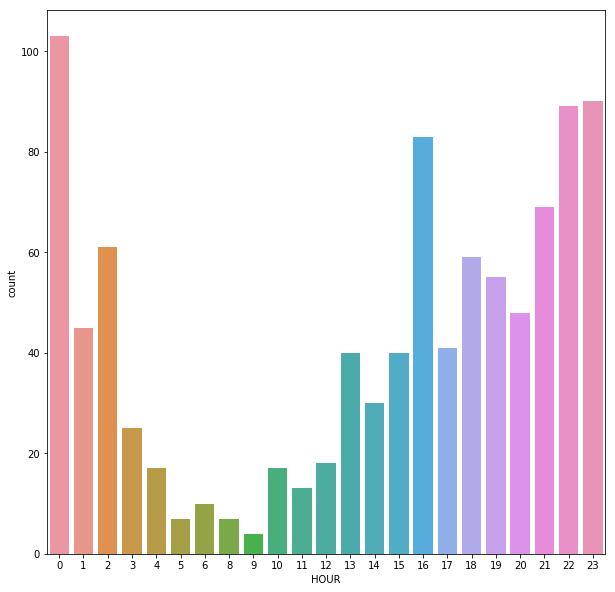

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x=df.HOUR)
plt.show()

#### *Well well, seems like late nights shouldn't be your thing..*

*Let us check the same according to the days*

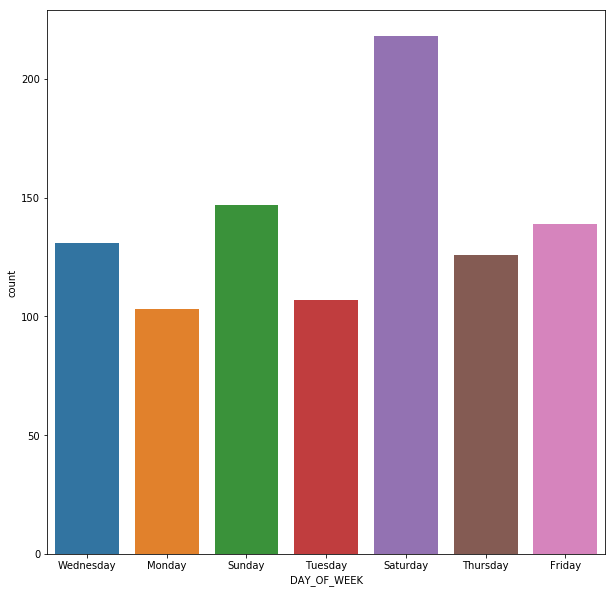

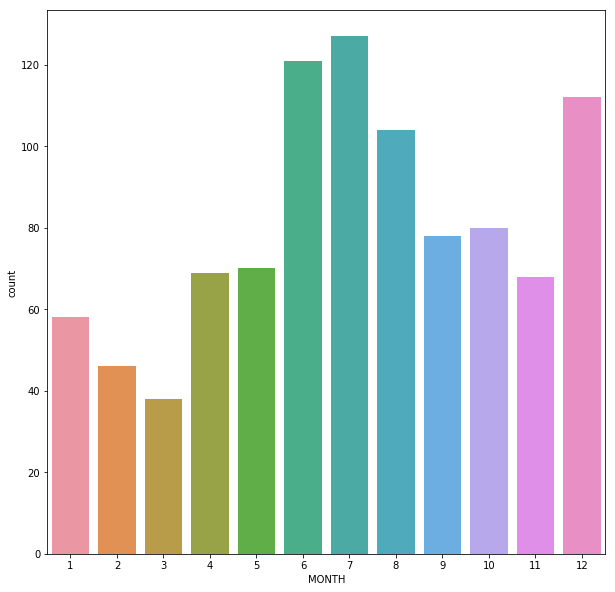

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x=df.DAY_OF_WEEK)
plt.show()
plt.figure(figsize=(10,10))
sns.countplot(x=df.MONTH)
plt.show()

#### Let's plot a map for the crimes. For that we'll have to narrow down our search to the year with the maximum number of crimes. 

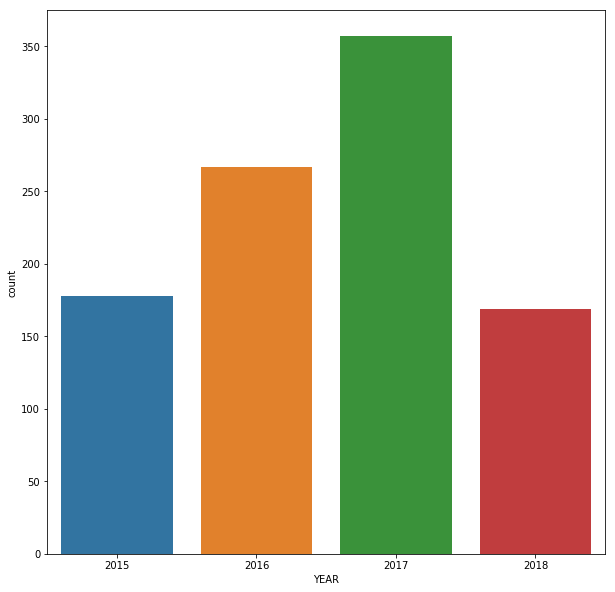

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x=df.YEAR)
plt.show()

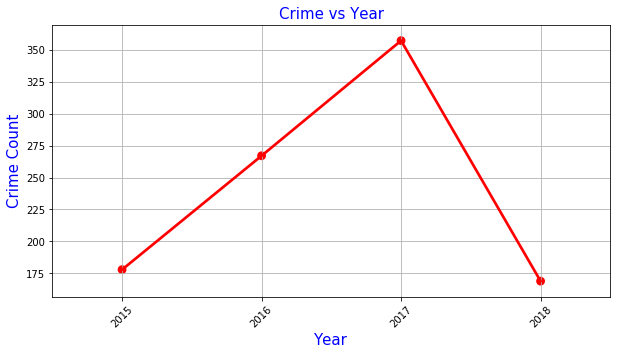

In [13]:
year_count = []

for i in df.YEAR.unique():
    year_count.append(len(df[df['YEAR']==i]))

plt.figure(figsize=(10,5))
sns.pointplot(x=df.YEAR.unique(),y=year_count,color='red',alpha=0.8)
plt.xlabel('Year',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Crime Count',fontsize = 15,color='blue')
plt.title('Crime vs Year',fontsize = 15,color='blue')
plt.grid()
plt.show()

# About Drug Violation

*2017 it is!*

In [14]:
import folium
from folium.plugins import HeatMap

map_crime = folium.Map(location=[42.361145,-71.057083]) #Boston Coordinates

heat_df =df[df['YEAR']==2017] # 2017
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Drug Violation'] 
heat_df = heat_df[['Lat', 'Long']] #drug crimes in 2017


    
    
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]


HeatMap(data=heat_data, radius=10).add_to(map_crime) 
map_crime 

## About Robbery

In [15]:
crime = folium.Map(location=[42.351145,-71.057083],
                    zoom_start = 12) 

heat_df = df[df['YEAR']==2017] 
heat_df = heat_df[heat_df['OFFENSE_CODE_GROUP']=='Robbery']
heat_df = heat_df[['Lat', 'Long']]

heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(data=heat_data, radius=10).add_to(crime)
crime

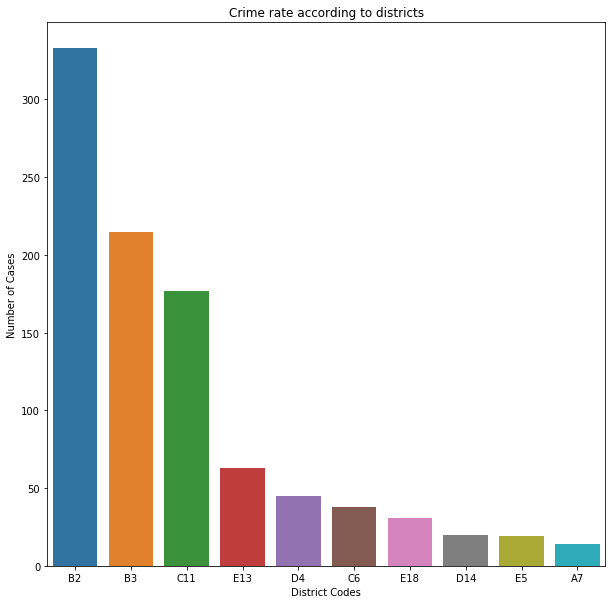

In [16]:
a=df['DISTRICT'].value_counts(dropna=True)
plt.figure(figsize=(10,10))
sns.barplot(x=a[0:10].index,y=a[0:10].values)
plt.xlabel('District Codes')
plt.ylabel('Number of Cases')
plt.title('Crime rate according to districts')
plt.show()